# Case Study on Probability for Data Science

## Problem Statement:
To make a suitable machine learning algorithm to predict if the mushroom is edible or poisonous (e or p) using the given dataset.(Along with other ML algorithms, Naïve Bayes’ Classifier should be applied) 
Also, if some data pre-processing is necessary do that as well.

## Attribute Information:
- cap-shape: bell=b, conical=c, convex=x, flat=f, knobbed=k, sunken=s
- cap-surface: fibrous=f, grooves=g, scaly=y, smooth=s
- cap-colour: brown=n, buff=b, cinnamon=c, Gray=g, green=r, pink=p, purple=u,red=e, white=w, yellow=y
- bruises: bruises=t, no=f
- odour: almond=a, anise=l, creosote=c, fishy=y, foul=f, musty=m, none=n, pungent=p, spicy=s
- gill-attachment: attached=a, descending=d, free=f, notched=n
- gill-spacing: close=c, crowded=w, distant=d
- gill-size: broad=b, narrow=n
- gill-colour: black=k, brown=n, buff=b, chocolate=h, grey=g, green=r, orange=o, pink=p, purple=u, red=e, white=w, yellow=y
- stalk-shape: enlarging=e, tapering=t
- Stalk-root: bulbous=b, club=c, cup=u, equal=e, rhizomorphs=z, rooted=r, missing=?
- stalk-surface-above-ring: fibrous=f, scaly=y, silky=k, smooth=s
- stalk-surface-below-ring: fibrous=f, scaly=y, silky=k, smooth=s 
- stalk-colour-above-ring: brown=n, buff=b, cinnamon=c, gray=g, orange=o, pink=p, red=e, white=w, yellow=y
- stalk-colour-below-ring: brown=n, buff=b, cinnamon=c, gray=g, orange=o, pink=p, red=e, white=w, yellow=y
- veil-type: partial=p, universal=u
- veil-colour: brown=n, orange=o, white=w, yellow=y
- ring-number: none=n, one=o, two=t
- ring-type: cobwebby=c, evanescent=e, flaring=f, large=l, none=n, pendant=p, sheathing=s, zone=z
- spore-print-colour: black=k, brown=n, buff=b, chocolate=h, green=r, orange=o, purple=u, white=w, yellow=y
- population: abundant=a, clustered=c, numerous=n, scattered=s, several=v, solitary=y
- habitat: grasses=g, leaves=l, meadows=m, paths=p, urban=u, waste=w, woods=d 

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Reading the dataset

In [2]:
df=pd.read_csv('mushrooms.csv')

In [3]:
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


# Preprocessing
Iabel encoding

In [4]:
from sklearn.preprocessing import LabelEncoder
label_en=LabelEncoder()
a=['class']
for i in np.arange(len(a)):
    df[a[i]]=label_en.fit_transform(df[a[i]])

In [5]:
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,0,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,0,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,1,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,0,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


# One Hot encoding

In [6]:
df=pd.get_dummies(df)

In [7]:
df.head()

,class,cap-shape_b,cap-shape_c,cap-shape_f,cap-shape_k,cap-shape_s,cap-shape_x,cap-surface_f,cap-surface_g,cap-surface_s,...,population_s,population_v,population_y,habitat_d,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w
0,1,0,0,0,0,0,1,0,0,1,...,1,0,0,0,0,0,0,0,1,0
1,0,0,0,0,0,0,1,0,0,1,...,0,0,0,0,1,0,0,0,0,0
2,0,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
3,1,0,0,0,0,0,1,0,0,0,...,1,0,0,0,0,0,0,0,1,0
4,0,0,0,0,0,0,1,0,0,1,...,0,0,0,0,1,0,0,0,0,0


# Splitting the data

In [8]:
y=df['class']
x=df.drop(['class'],axis=1)
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

# Modeling using Naive-Bayes Model

In [9]:
from sklearn.metrics import f1_score,confusion_matrix,precision_score,recall_score,accuracy_score
from sklearn.naive_bayes import GaussianNB
classifier=GaussianNB()
classifier.fit(x_train,y_train)
y_pred=classifier.predict(x_test)

In [10]:
print("Accuracy is:",accuracy_score(y_test,y_pred))
print("Precision is:",precision_score(y_test,y_pred,average='weighted'))
print("Recall is:",recall_score(y_test,y_pred,average='weighted'))
print("F1 Score is:",f1_score(y_test,y_pred,average='weighted'))

Accuracy is: 0.96
Precision is: 0.9630696576151121
Recall is: 0.96
F1 Score is: 0.9599960615145977


In [11]:
confusion_matrix(y_test,y_pred)

array([[778,  65],
       [  0, 782]], dtype=int64)

# Modeling using RandomForestClassifier

In [12]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
rf.fit(x_train,y_train)
y_pred=rf.predict(x_test)

In [13]:
print("Accuracy is:",accuracy_score(y_test,y_pred))
print("Precision is:",precision_score(y_test,y_pred,average='weighted'))
print("Recall is:",recall_score(y_test,y_pred,average='weighted'))
print("F1 Score is:",f1_score(y_test,y_pred,average='weighted'))

Accuracy is: 1.0
Precision is: 1.0
Recall is: 1.0
F1 Score is: 1.0


In [14]:
confusion_matrix(y_test,y_pred)

array([[843,   0],
       [  0, 782]], dtype=int64)

# Modeling using GradientBoostingClassifier

In [15]:
from sklearn.ensemble import GradientBoostingClassifier
gb=GradientBoostingClassifier()
gb.fit(x_train,y_train)
y_predict=gb.predict(x_test)

In [16]:
print("Accuracy is:",accuracy_score(y_test,y_predict))
print("Precision is:",precision_score(y_test,y_predict,average='weighted'))
print("Recall is:",recall_score(y_test,y_predict,average='weighted'))
print("F1 Score is:",f1_score(y_test,y_predict,average='weighted'))

Accuracy is: 1.0
Precision is: 1.0
Recall is: 1.0
F1 Score is: 1.0


In [17]:
confusion_matrix(y_test,y_predict)

array([[843,   0],
       [  0, 782]], dtype=int64)

# Modeling using LogisticRegression

In [20]:
from sklearn.linear_model import LogisticRegression
log_r=LogisticRegression()
log_r.fit(x_train,y_train)
y_preddd=log_r.predict(x_test)

In [21]:
print("Accuracy is:",accuracy_score(y_test,y_preddd))
print("Precision is:",precision_score(y_test,y_preddd,average='weighted'))
print("Recall is:",recall_score(y_test,y_preddd,average='weighted'))
print("F1 Score is:",f1_score(y_test,y_preddd,average='weighted'))

Accuracy is: 1.0
Precision is: 1.0
Recall is: 1.0
F1 Score is: 1.0


In [22]:
confusion_matrix(y_test,y_preddd)

array([[843,   0],
       [  0, 782]], dtype=int64)

# Modeling using KNeighborsClassifier

In [23]:
from sklearn.neighbors import KNeighborsClassifier
acc_values=[]
neighbors=np.arange(3,15)
for k in neighbors:
    classifier = KNeighborsClassifier(n_neighbors=k, metric='minkowski')
    classifier.fit(x_train,y_train)
    y_predic=classifier.predict(x_test)
    acc=accuracy_score(y_test,y_predic)
    acc_values.append(acc)

Text(0, 0.5, 'accuracy')

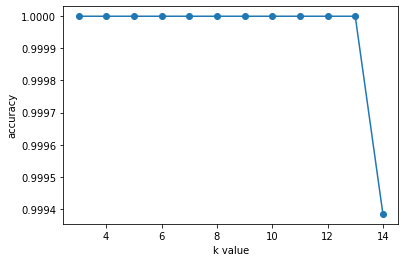

In [24]:
plt.plot(neighbors,acc_values,'o-')
plt.xlabel('k value')
plt.ylabel('accuracy')

In [25]:
classifier = KNeighborsClassifier(n_neighbors=4, metric='minkowski')
classifier.fit(x_train,y_train)
y_predic=classifier.predict(x_test)

In [26]:
print("Accuracy is:",accuracy_score(y_test,y_predic))
print("Precision is:",precision_score(y_test,y_predic,average='weighted'))
print("Recall is:",recall_score(y_test,y_predic,average='weighted'))
print("F1 Score is:",f1_score(y_test,y_predic,average='weighted'))

Accuracy is: 1.0
Precision is: 1.0
Recall is: 1.0
F1 Score is: 1.0


# Modeling using DecisionTreeClassifier

In [27]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()
dt.fit(x_train,y_train)
y_pr=dt.predict(x_test)

In [28]:
print("Accuracy is:",accuracy_score(y_test,y_pr))
print("Precision is:",precision_score(y_test,y_pr,average='weighted'))
print("Recall is:",recall_score(y_test,y_pr,average='weighted'))
print("F1 Score is:",f1_score(y_test,y_pr,average='weighted'))

Accuracy is: 1.0
Precision is: 1.0
Recall is: 1.0
F1 Score is: 1.0


In [29]:
confusion_matrix(y_test,y_pr)

array([[843,   0],
       [  0, 782]], dtype=int64)

# Modeling using SVM Model

In [30]:
from sklearn.svm import SVC

In [31]:
svm_linear=SVC(kernel='linear')
svm_linear.fit(x_train,y_train)
y_pre=svm_linear.predict(x_test)

In [32]:
print("Accuracy is:",accuracy_score(y_test,y_pre))
print("Precision is:",precision_score(y_test,y_pre,average='weighted'))
print("Recall is:",recall_score(y_test,y_pre,average='weighted'))
print("F1 Score is:",f1_score(y_test,y_pre,average='weighted'))

Accuracy is: 1.0
Precision is: 1.0
Recall is: 1.0
F1 Score is: 1.0


In [33]:
confusion_matrix(y_test,y_pre)

array([[843,   0],
       [  0, 782]], dtype=int64)

### Summary
    Accuracy is 0.96 with Naive-Bayes Model while with the rest of the ML models we get accuracy 1.